In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/selecao-de-features/main/dados/pistachio.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
df = pd.read_csv(url)
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [ ]:
mapeamento = {'Kirmizi_Pistachio': 0, 'Siit_Pistachio': 1}
df['Class'] = df['Class'].map(mapeamento)
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,0
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,1
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,0
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,0
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,0
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,0
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,1
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,0


In [ ]:
x = df.drop(['Class'], axis=1)
y = df['Class']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=50, test_size=0.3,
                                                        stratify=y)

In [ ]:
modelo = RandomForestClassifier(random_state=2)
modelo.fit(x_treino, y_treino)

RandomForestClassifier(random_state=2)

In [ ]:
modelo.score(x_teste, y_teste)

0.8643410852713178

In [ ]:
df['Class'].value_counts()

Class
0    998
1    720
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='AREA'>

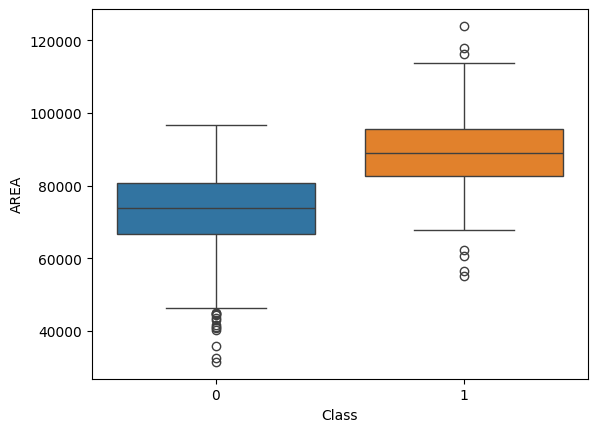

In [ ]:
sns.boxplot(x_treino, x=y_treino, y='AREA', hue=y_treino, legend=False)

<Axes: xlabel='Class', ylabel='ROUNDNESS'>

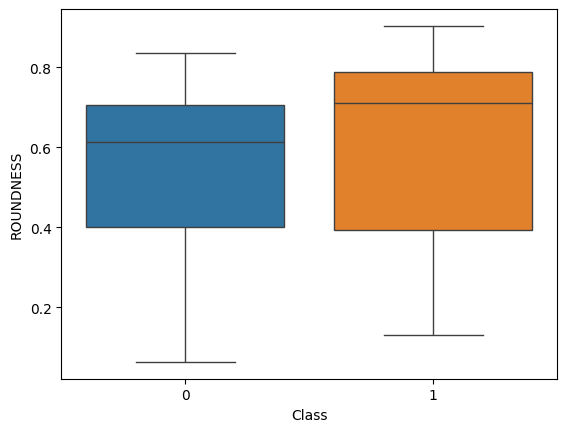

In [ ]:
sns.boxplot(x_treino, x=y_treino, y='ROUNDNESS', hue=y_treino, legend=False)

In [ ]:
correlacao = pd.concat([x_treino, y_treino], axis=1).corr()

<Axes: >

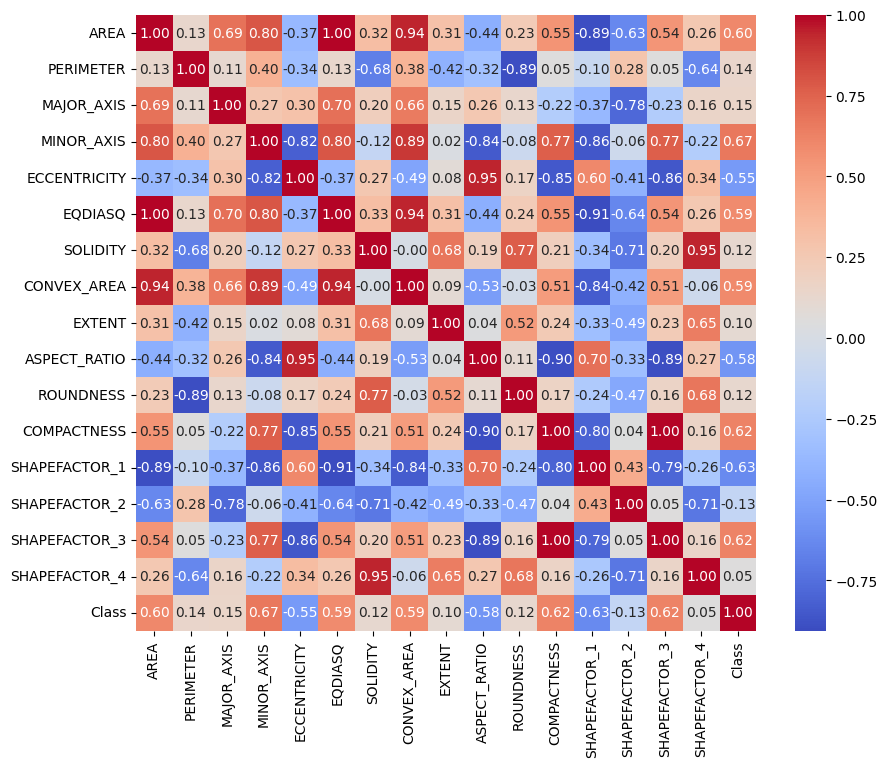

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
modelo = RandomForestClassifier(random_state=2)
modelo.fit(x_treino, y_treino)

RandomForestClassifier(random_state=2)

In [ ]:
importancia = pd.DataFrame({
    'colunas': x_treino.columns, 'importancia': modelo.feature_importances_
    })

In [ ]:
importancia10 = importancia.sort_values(by='importancia', ascending=False).head(10)
importancia10

,colunas,importancia
12,SHAPEFACTOR_1,0.185261
3,MINOR_AXIS,0.179252
14,SHAPEFACTOR_3,0.094308
11,COMPACTNESS,0.084365
15,SHAPEFACTOR_4,0.057877
0,AREA,0.057268
7,CONVEX_AREA,0.054696
9,ASPECT_RATIO,0.048584
4,ECCENTRICITY,0.048316
5,EQDIASQ,0.036724


<ipython-input-18-8da15bf8e4e3>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


[Text(0, 0, 'SHAPEFACTOR_1'),
 Text(1, 0, 'MINOR_AXIS'),
 Text(2, 0, 'SHAPEFACTOR_3'),
 Text(3, 0, 'COMPACTNESS'),
 Text(4, 0, 'SHAPEFACTOR_4'),
 Text(5, 0, 'AREA'),
 Text(6, 0, 'CONVEX_AREA'),
 Text(7, 0, 'ASPECT_RATIO'),
 Text(8, 0, 'ECCENTRICITY'),
 Text(9, 0, 'EQDIASQ')]

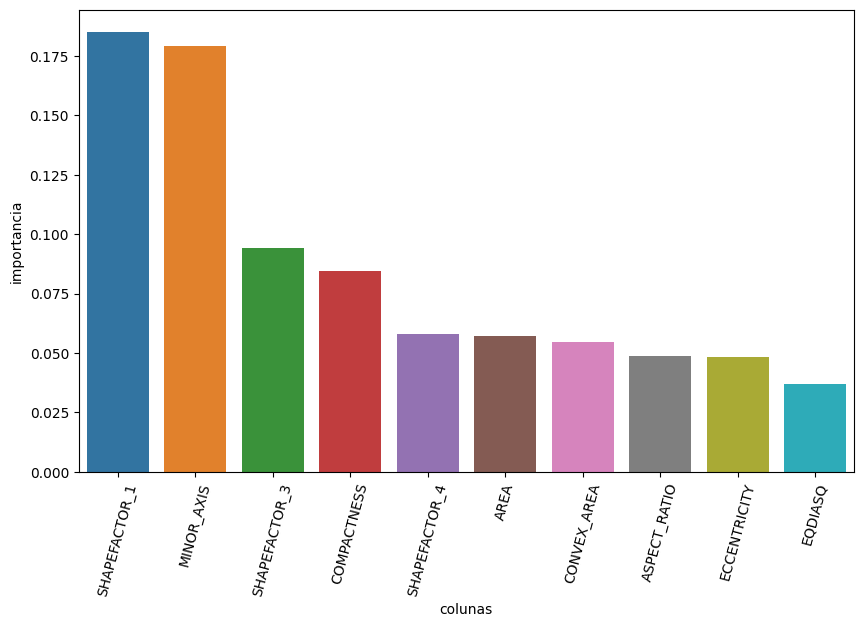

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='colunas', y='importancia', data=importancia10, hue='colunas', legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
modelo_fselecionadas = SelectFromModel(modelo, max_features=10, prefit=True)

In [ ]:
x_treino_selecionado = modelo_fselecionadas.transform(x_treino)
x_teste_selecionado = modelo_fselecionadas.transform(x_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
modelo = RandomForestClassifier(n_estimators=20, random_state=2)
modelo.fit(x_treino_selecionado, y_treino)
print(f'Score: {modelo.score(x_teste_selecionado, y_teste)}')

Score: 0.8624031007751938


In [ ]:
modelo = RandomForestClassifier(random_state=2)

In [ ]:
parametros_busca = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros_busca,
                           scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
modelo_fselecionadas = SelectFromModel(grid_search.best_estimator_, max_features=10,
                                       prefit=True)

In [ ]:
x_treino_selecionado = modelo_fselecionadas.transform(x_treino)
x_teste_selecionado = modelo_fselecionadas.transform(x_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
modelo = grid_search.best_estimator_

In [ ]:
modelo.fit(x_treino_selecionado, y_treino)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2)

In [ ]:
score = modelo.score(x_teste_selecionado, y_teste)
print(f'Score: {score}')

Score: 0.874031007751938


In [ ]:
modelo = RandomForestClassifier(n_estimators=20,random_state=2)

In [ ]:
selecionador = RFE(modelo,n_features_to_select=10, step=1)
selecionador.fit(x_treino, y_treino)

RFE(estimator=RandomForestClassifier(n_estimators=20, random_state=2),
    n_features_to_select=10)

In [ ]:
x_treino_selecionado = selecionador.transform(x_treino)
x_teste_selecionado = selecionador.transform(x_teste)

In [ ]:
modelo.fit(x_treino_selecionado,y_treino)
print(f'Score: {modelo.score(x_teste_selecionado,y_teste)}')

Score: 0.8662790697674418


In [ ]:
modelo = RandomForestClassifier(n_estimators=20, random_state=2)

In [ ]:
cv = StratifiedKFold(5, shuffle=True, random_state=500)

In [ ]:
rfecv = RFECV(
    estimator=modelo,
    step=1,
    cv=cv,
    scoring='roc_auc',
    min_features_to_select=1,
    importance_getter='auto'
)

In [ ]:
rfecv.fit(x_treino, y_treino)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=20, random_state=2),
      scoring='roc_auc')

In [ ]:
print(f'O número ideal de features é: {rfecv.n_features_}\n')
print(f'O ranking das features é {rfecv.ranking_}\n')
print(f'Score: {rfecv.cv_results_}')

O número ideal de features é: 12

O ranking das features é [1 1 3 1 1 1 1 1 4 1 2 1 1 5 1 1]

Score: {'mean_test_score': array([0.85125296, 0.89701902, 0.92232098, 0.92796625, 0.92751339,
       0.92582943, 0.9268012 , 0.93206557, 0.92743112, 0.93389201,
       0.93641083, 0.93736199, 0.93515544, 0.93116696, 0.93423195,
       0.93550351]), 'std_test_score': array([0.01043864, 0.00801947, 0.01130463, 0.01084405, 0.01177559,
       0.01229748, 0.01464415, 0.01057563, 0.01077954, 0.01303251,
       0.01256628, 0.01056761, 0.01038817, 0.01254121, 0.01118765,
       0.01102541]), 'split0_test_score': array([0.84752475, 0.89639321, 0.90590523, 0.91566478, 0.92613154,
       0.91955446, 0.91916549, 0.92294908, 0.92903112, 0.92372702,
       0.94013437, 0.9258133 , 0.92708628, 0.91824611, 0.9216761 ,
       0.92248939]), 'split1_test_score': array([0.86096181, 0.90922914, 0.92072136, 0.93253182, 0.91838755,
       0.92623762, 0.90838048, 0.92270156, 0.91181047, 0.92294908,
       0.91559406, 

In [ ]:
y_pred = rfecv.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_pred)

Text(0.5, 1.0, 'Matriz de Confusão')

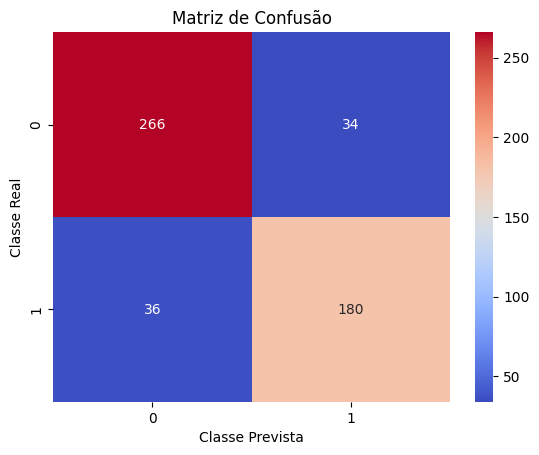

In [ ]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')